# Predict the diabetes based on diagnostic measures

#### About DATA:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Columns
> 1.Pregnancies = Number of times pregnant

> 2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> 3.BloodPressure = Diastolic blood pressure (mm Hg)

> 4.SkinThickness = Triceps skin fold thickness (mm)

> 5.Insulin = 2-Hour serum insulin (mu U/ml)

> 6.BMI = Body mass index (weight in kg/(height in m)^2)

> 7.DiabetesPedigreeFunction = Diabetes pedigree function

> 8.Age = Age (years)

> 9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('pima-data.csv')

In [3]:
data.shape

(768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [5]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


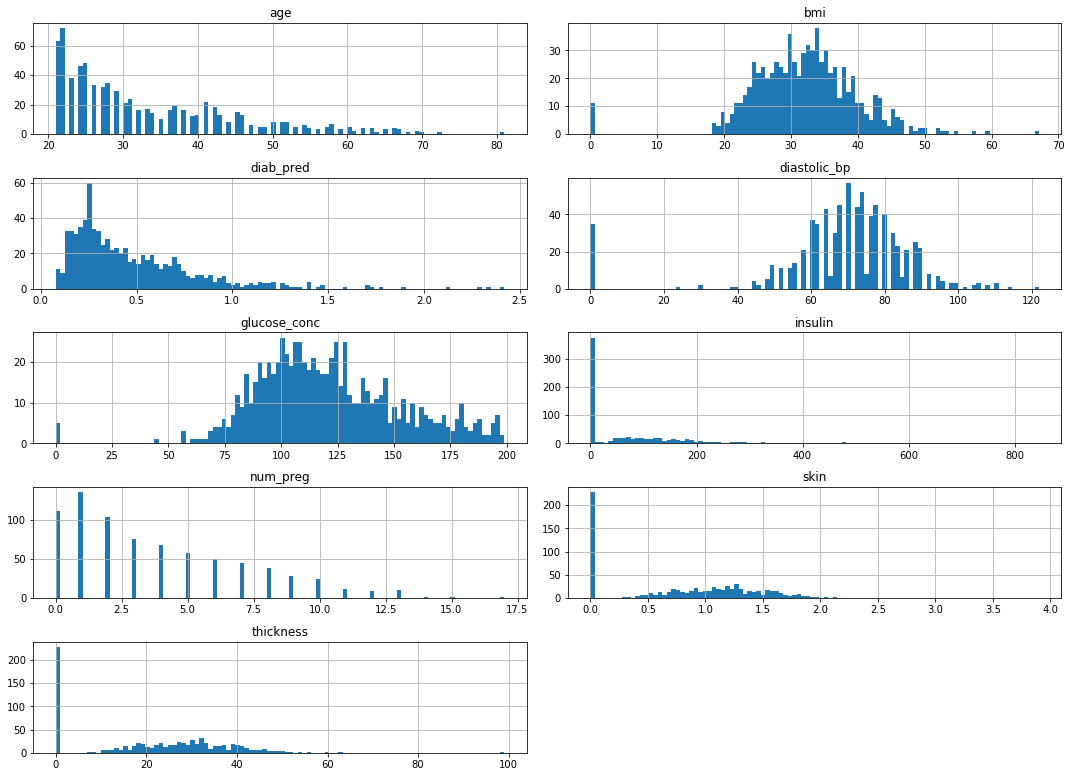

In [12]:
# Histogram
columns = list(data)[0:-1]
data[columns].hist(stacked = False, bins = 100, figsize = (15,30), layout = (14,2))
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

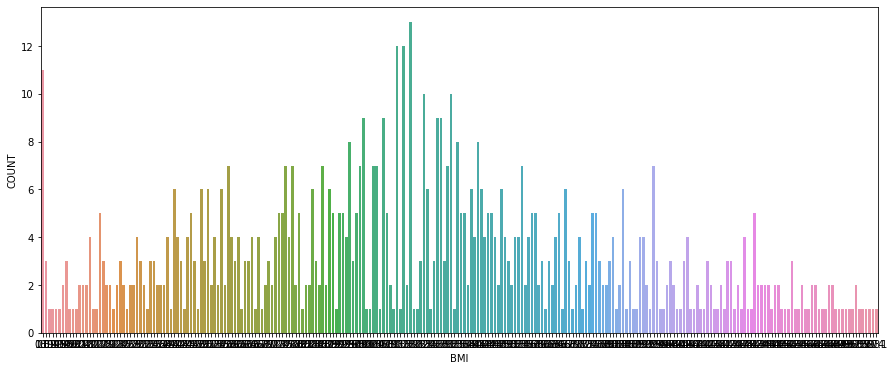

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=data.bmi.value_counts().index, y=data.bmi.value_counts().values)
plt.xlabel('BMI')
plt.ylabel('COUNT')
plt.tight_layout

In [14]:
data.bmi.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: bmi, Length: 248, dtype: int64

In [19]:
data.num_preg.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: num_preg, dtype: int64

Text(0, 0.5, 'COUNT')

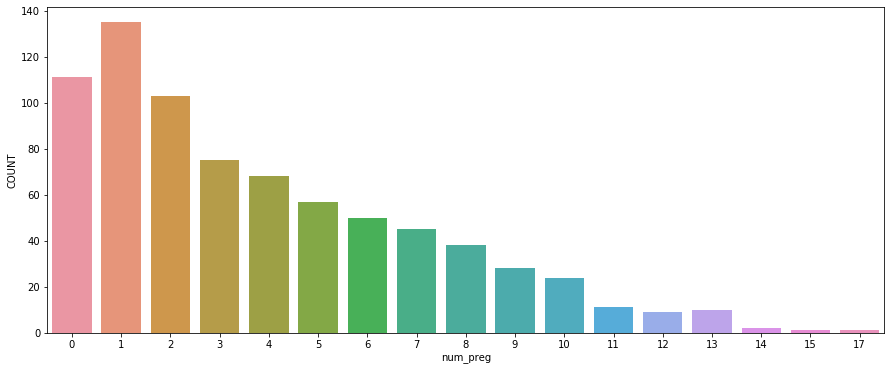

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x=data.num_preg.value_counts().index, y=data.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel('COUNT')

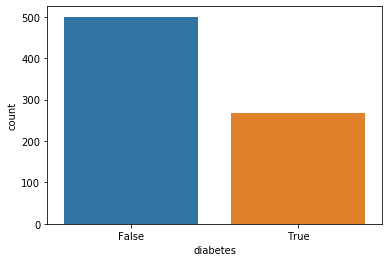

In [23]:
sns.countplot(data.diabetes)


In [26]:
# correlation matrix
corrmat = data.corr()
corrmat

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [27]:
corrmat.index

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

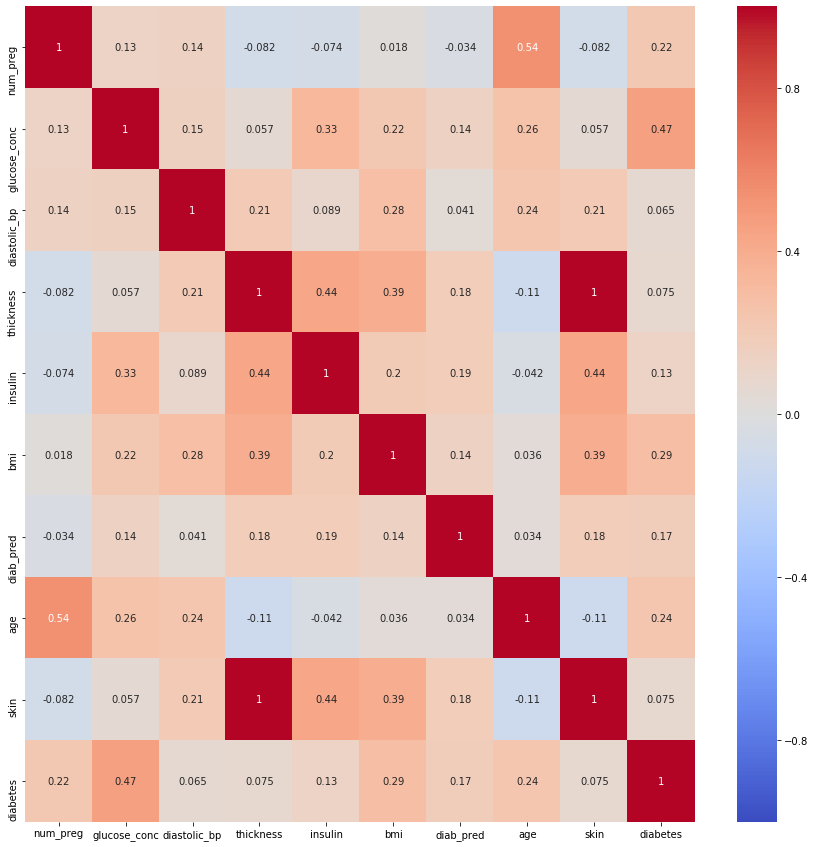

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [33]:
# changing boolean to number
data['diabetes']=data['diabetes'].map({True:1, False:0})

In [34]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [44]:
n_true = len(data.loc[data['diabetes'] == True] )
n_false = len(data.loc[data['diabetes'] == False] )

print('Number of True Cases: {0}({1:2.2f}%)'.format(n_true, (n_true/(n_true+n_false))*100))
print('Number of False Cases: {0}({1:2.2f}%)'.format(n_false, (n_false/(n_true+n_false))*100))

Number of True Cases: 268(34.90%)
Number of False Cases: 500(65.10%)


In [45]:
# Start Building the models
from sklearn.model_selection import train_test_split

In [47]:
# spliting train and test date
X = data.drop(['diabetes'], axis=1)
y = data.diabetes.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
print('SVC accuracy: {: .2f}%'.format(svm.score(X_test, y_test)*100))

SVC accuracy:  69.48%


C:\Users\liche\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print('NB accuracy: {: .2f}%'.format(nb.score(X_test, y_test)*100))

NB accuracy:  78.57%


In [52]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('KNN accuracy: {: .2f}%'.format(knn.score(X_test, y_test)*100))

KNN accuracy:  72.08%


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest accuracy: {: .2f}%'.format(rf.score(X_test, y_test)*100))

Random Forest accuracy:  79.22%


In [55]:
#XG boost
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print('XG boost accuracy: {: .2f}%'.format(xg.score(X_test, y_test)*100))

XG boost accuracy:  81.82%
